<a href="https://colab.research.google.com/github/KingKouame/KingKouame/blob/main/Data_Viz_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

For this task, I have decided to use Google Colab as it is easier to use for me and I am more familiar with the platform.

To get started, first we are importing 'pandas' which will allow us to select data from a dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

I mount my Google drive which will give me access to the files I upload.

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


To ensure I have the correct file and access to the document, I run the first 5 lines.

In [8]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Cars93.csv')
df.head()

,Unnamed: 0,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,1,Acura,Integra,Small,12.9,15.9,18.8,25,31,NaN,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,4,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver & Passenger,...,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,...,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i


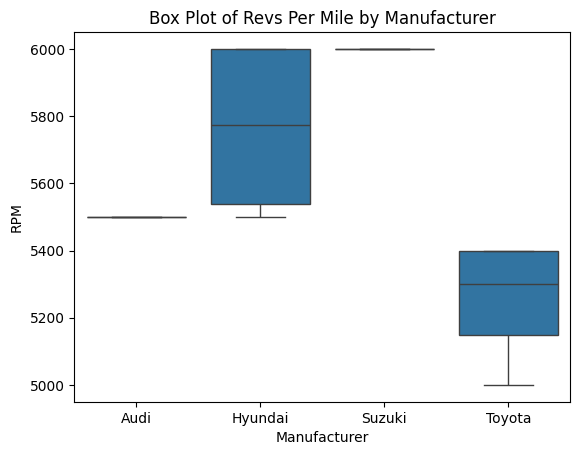

Manufacturer with the highest revs per mile: Hyundai


In [10]:
# This function will allow us to filter the data for the specified manufacturers.

df_filtered = df[df['Manufacturer'].isin(['Audi', 'Hyundai', 'Suzuki', 'Toyota'])]

# We then create a box plot for the revs per mile.

sns.boxplot(x='Manufacturer', y='RPM', data=df_filtered)
plt.xlabel('Manufacturer')
plt.ylabel('RPM')
plt.title('Box Plot of Revs Per Mile by Manufacturer')
plt.show()

# Followed by a function to find the manufacturer with the highest revs per mile.

highest_rpm = df_filtered.groupby('Manufacturer')['RPM'].max()
highest_rpm_manufacturer = highest_rpm.sort_values(ascending=False).index[0]

print(f"Manufacturer with the highest revs per mile: {highest_rpm_manufacturer}")

Index(['Unnamed: 0', 'Manufacturer', 'Model', 'Type', 'Min.Price', 'Price',
       'Max.Price', 'MPG.city', 'MPG.highway', 'AirBags', 'DriveTrain',
       'Cylinders', 'EngineSize', 'Horsepower', 'RPM', 'Rev.per.mile',
       'Man.trans.avail', 'Fuel.tank.capacity', 'Passengers', 'Length',
       'Wheelbase', 'Width', 'Turn.circle', 'Rear.seat.room', 'Luggage.room',
       'Weight', 'Origin', 'Make'],
      dtype='object')


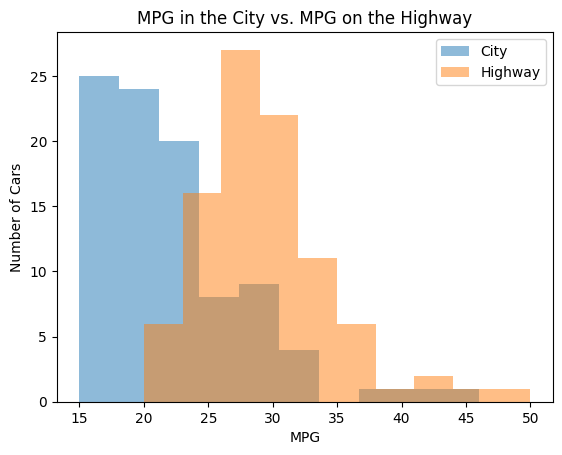

Mean MPG in the City: 22.37
Mean MPG on the Highway: 29.09


In [15]:
# Here we created a histogram of MPG in the city and on the highway.

df['MPG.city'].plot.hist(bins=10, alpha=0.5)
df['MPG.highway'].plot.hist(bins=10, alpha=0.5)
plt.xlabel('MPG')
plt.ylabel('Number of Cars')
plt.title('MPG in the City vs. MPG on the Highway')
plt.legend(['City', 'Highway'])
plt.show()

# To answer the question, we need to compare the mean MPG values for city and highway driving.

print(f"Mean MPG in the City: {df['MPG.city'].mean():.2f}")
print(f"Mean MPG on the Highway: {df['MPG.highway'].mean():.2f}")

# Based on the mean MPG values, we can conclude that driving on the highway is more fuel efficient than driving in the city.


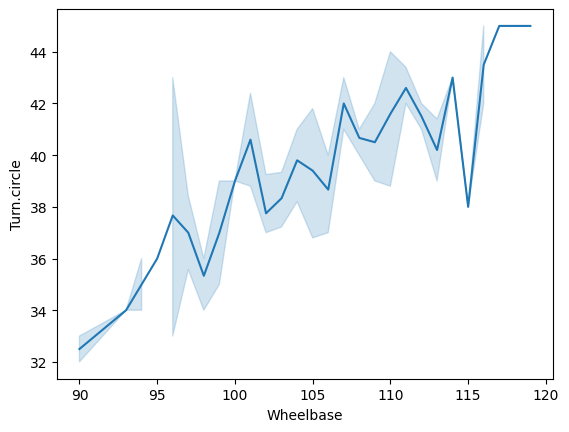

In [23]:
# This function allow us to see the relationship between 'Wheekbase' and 'turning circle'.

sns.lineplot(x = df['Wheelbase'], y = df['Turn.circle'])
plt.show()

# Relationship:
# There appears to be a positive correlation between wheelbase and turning circle. This means that as the wheelbase gets larger, the turning circle also tends to get larger.

# Explanation:
# A larger wheelbase typically means that the distance between the front and rear axles of the car is greater. This can affect the car's maneuverability, making it more difficult to turn. As a result, cars with larger wheelbases often have larger turning circles.


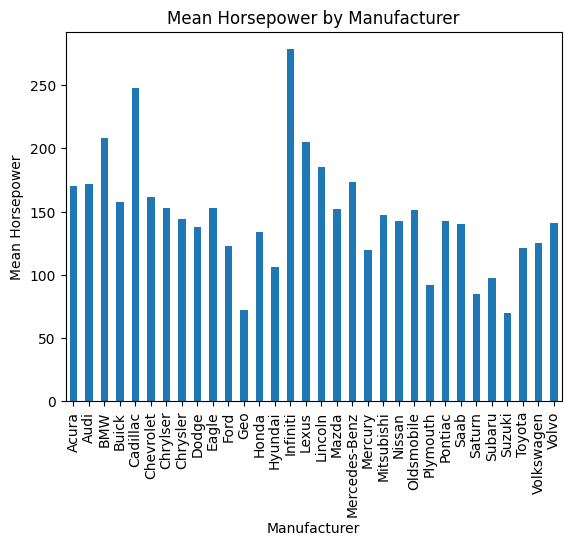

In [26]:
# This function allows us to create a barplot for mean horsepower.

df.groupby('Manufacturer')['Horsepower'].mean().plot(kind='bar')

# Adding labels and title.

plt.xlabel('Manufacturer')
plt.ylabel('Mean Horsepower')
plt.title('Mean Horsepower by Manufacturer')

plt.show()

# Based on the barplot, we can see that there is a general trend of larger cars having more horsepower. However, there are some exceptions to this trend. For example, the Toyota Corolla has a relatively small engine but still has a higher horsepower than some larger cars, such as the Chevrolet Corsica.
